In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, auc, roc_curve, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from collections import Counter   
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump


In [3]:
# data_dir = "D:\\study\\sknetworks\\team_project\\sk_2nd\\data\\"
data_dir = "C:\\KIMUJUNG\\team_project\\data\\"
df = pd.read_csv(data_dir + 'final_data.csv')
df.head(2)

,city,bd,gender,registered_via,is_churn,payment_plan_sum,plan_list_price,actual_amount_paid,discount_rate,is_auto_renew,...,transaction_count,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,registration_duration,listening_duration
0,4,30,1,9,0,603,2980,3129,0.0,1.0,...,21,77,22,16,44,658,287,171508.646,2070,781
1,5,34,1,9,1,360,1072,1072,0.0,0.0,...,2,145,84,58,42,1678,1158,448313.054,2168,220


In [5]:
df['gender'].value_counts()

gender
1    187836
0    168441
Name: count, dtype: int64

In [6]:
df.columns

Index(['city', 'bd', 'gender', 'registered_via', 'is_churn',
       'payment_plan_sum', 'plan_list_price', 'actual_amount_paid',
       'discount_rate', 'is_auto_renew', 'is_cancel', 'transaction_count',
       'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq',
       'total_secs', 'registration_duration', 'listening_duration'],
      dtype='object')

In [4]:
X = df.drop(['is_churn'],axis=1)
y = df['is_churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# skf = StratifiedKFold(n_splits=5)
# dt_clf = DecisionTreeClassifier(random_state=42)
# params = {
#     # "max_depth": [12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
#     "max_depth": [1,2,3,4,5,6,7,8,9,10,11,12]
# }
# gscv_tree = GridSearchCV (dt_clf, params, scoring ='accuracy', cv = skf)
# gscv_tree.fit(X_train_scaled, y_train)
# print(gscv_tree.best_estimator_)

In [8]:
stratified_kfold = StratifiedKFold(n_splits=5)
dt_clf = DecisionTreeClassifier(max_depth=11, random_state=42)

dt_accuracy = []
dt_precision = []
dt_recall = []
dt_matrix = []
dt_curve = []

for train_index, val_index in stratified_kfold.split(X, y):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[val_index], y.iloc[val_index]

    dt_clf.fit(X_train, y_train)
    y_pred_dt = dt_clf.predict(X_val)
    y_pred_proba = dt_clf.predict_proba(X_val)[:, 1]

    dt_accuracy.append(accuracy_score(y_val, y_pred_dt))
    dt_precision.append(precision_score(y_val, y_pred_dt))
    dt_recall.append(recall_score(y_val, y_pred_dt))
    dt_matrix.append(confusion_matrix(y_val, y_pred_dt))
    dt_curve.append(roc_curve(y_val, y_pred_proba))

print("의사결정나무 정확도:", np.mean(dt_accuracy))
print("의사결정나무 정밀도:", np.mean(dt_precision))
print("의사결정나무 재현율:", np.mean(dt_recall))

의사결정나무 정확도: 0.8762984757462711
의사결정나무 정밀도: 0.6932997120518399
의사결정나무 재현율: 0.5290680177945998


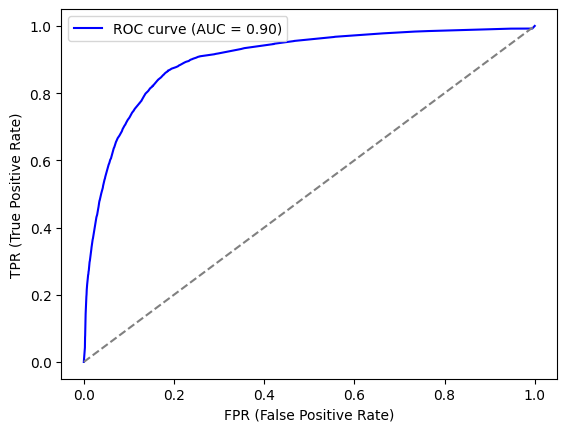

In [9]:
fpr, tpr, thresholds = dt_curve[0]
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.legend()
plt.show()

In [10]:
dt_matrix

[array([[55971,  2790],
        [ 5616,  6879]], dtype=int64),
 array([[56217,  2544],
        [ 6112,  6383]], dtype=int64),
 array([[55584,  3177],
        [ 5942,  6552]], dtype=int64),
 array([[55558,  3202],
        [ 5722,  6773]], dtype=int64),
 array([[55822,  2938],
        [ 6029,  6466]], dtype=int64)]

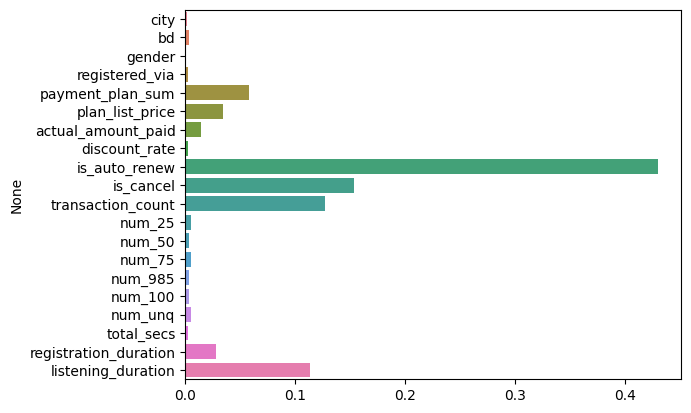

In [11]:
# 특성 중요도
dt_clf.feature_importances_

sns.barplot(x=dt_clf.feature_importances_, y=X_train.columns, hue=X_train.columns)
plt.show()

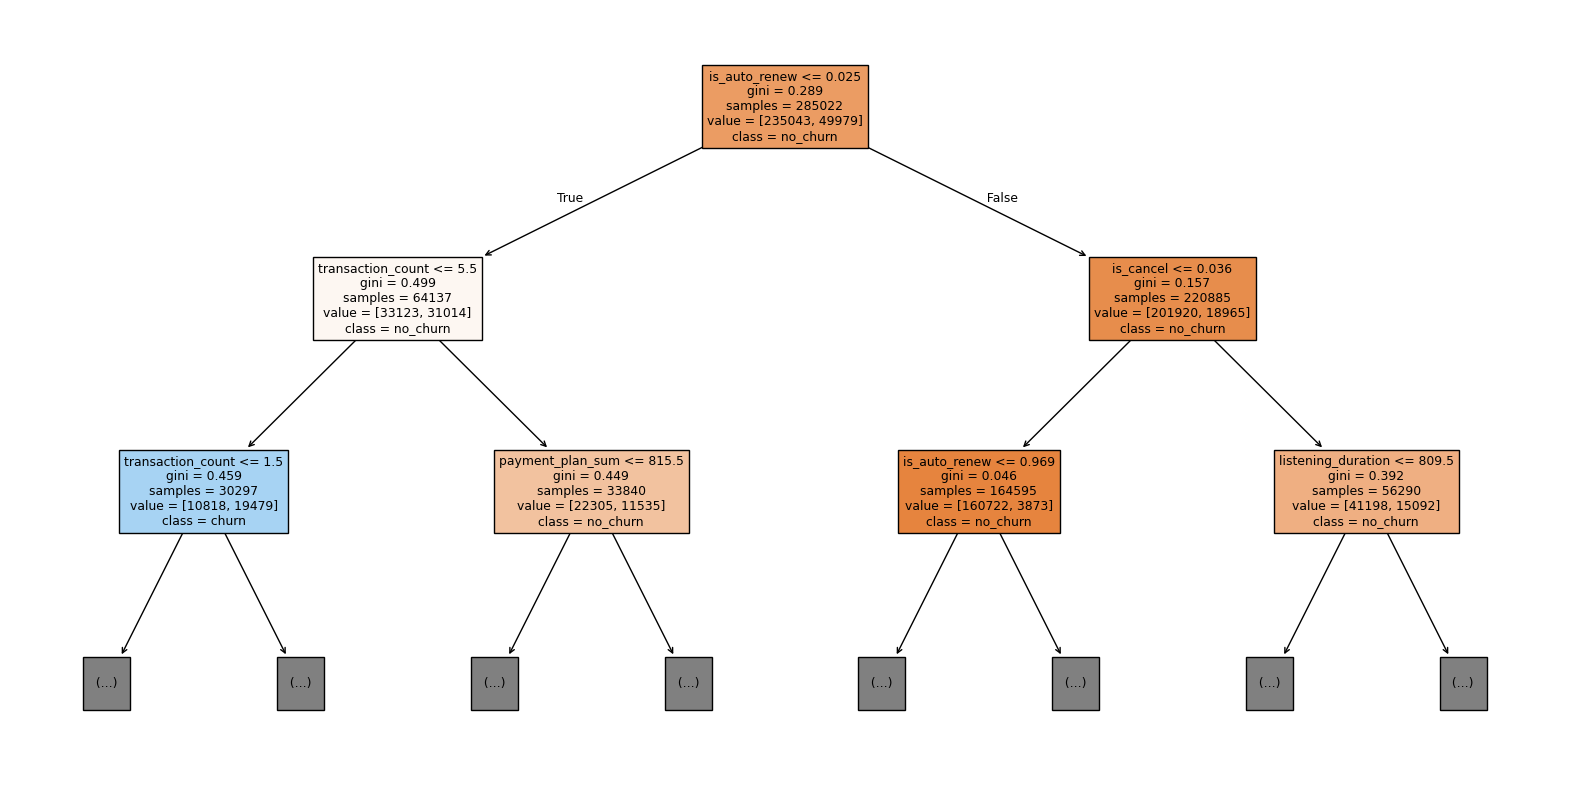

In [12]:
# 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    dt_clf,
    filled=True,
    feature_names=X_train.columns,
    class_names=['no_churn','churn'], 
    max_depth=2
)
plt.show()

In [8]:
counter = Counter(y)
print(counter)

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

counter = Counter(y_res)
print(counter)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Counter({0: 293803, 1: 62474})
Counter({0: 293803, 1: 293803})


c:\Users\kwj\anaconda3\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\kwj\anaconda3\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [14]:
# skf = StratifiedKFold(n_splits=5)
# dt_clf = DecisionTreeClassifier(random_state=42)
# params = {
#     # "max_depth": [50,55,60,65,70,75,80,85,90,95,100]
#     "max_depth": [51,52,53,54,55,56,57,58,59]
#     # "max_depth": [5,10,15,20,25,30,35,40,45,50]
#     # "max_depth": [1,2,3,4,5,6,7,8,9,10,11,12]
# }
# gscv_tree = GridSearchCV (dt_clf, params, scoring ='accuracy', cv = skf)
# gscv_tree.fit(X_train_scaled, y_train)
# print(gscv_tree.best_estimator_)

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5)
dt_clf = DecisionTreeClassifier(max_depth=53, random_state=42)

dt_accuracy_over = []
dt_precision_over = []
dt_recall_over = []
dt_matrix_over = []
dt_curve_over = []

for train_index, val_index in stratified_kfold.split(X_res, y_res):
    X_train, y_train = X_res.iloc[train_index], y_res.iloc[train_index]
    X_val, y_val = X_res.iloc[val_index], y_res.iloc[val_index]

    dt_clf.fit(X_train, y_train)
    y_pred_dt = dt_clf.predict(X_val)   # 검증 데이터로 예측
    y_pred_proba = dt_clf.predict_proba(X_val)[:, 1]

    dt_accuracy_over.append(accuracy_score(y_val, y_pred_dt))
    dt_precision_over.append(precision_score(y_val, y_pred_dt))
    dt_recall_over.append(recall_score(y_val, y_pred_dt))
    dt_matrix_over.append(confusion_matrix(y_val, y_pred_dt))
    dt_curve_over.append(roc_curve(y_val, y_pred_proba))

print("의사결정나무 정확도:", np.mean(dt_accuracy_over))
print("의사결정나무 정밀도:", np.mean(dt_precision_over))
print("의사결정나무 재현율:", np.mean(dt_recall_over))

의사결정나무 정확도: 0.9423882646417037
의사결정나무 정밀도: 0.8986019286884481
의사결정나무 재현율: 0.9973723979481953


In [16]:
dt_matrix

[array([[52769,  5992],
        [  618, 58143]], dtype=int64),
 array([[52339,  6422],
        [  154, 58606]], dtype=int64),
 array([[51899,  6862],
        [    0, 58760]], dtype=int64),
 array([[51930,  6830],
        [    0, 58761]], dtype=int64),
 array([[51785,  6975],
        [    0, 58761]], dtype=int64)]

In [17]:
dt_curve

[(array([0.       , 0.1019724, 1.       ]),
  array([0.        , 0.98948282, 1.        ]),
  array([inf,  1.,  0.])),
 (array([0.        , 0.10929018, 1.        ]),
  array([0.        , 0.99737917, 1.        ]),
  array([inf,  1.,  0.])),
 (array([0.        , 0.11677814, 1.        ]),
  array([0., 1., 1.]),
  array([inf,  1.,  0.])),
 (array([0.        , 0.11618448, 0.11623553, 1.        ]),
  array([0.        , 0.99984684, 1.        , 1.        ]),
  array([       inf, 1.        , 0.93103448, 0.        ])),
 (array([0.       , 0.1187032, 1.       ]),
  array([0., 1., 1.]),
  array([inf,  1.,  0.]))]

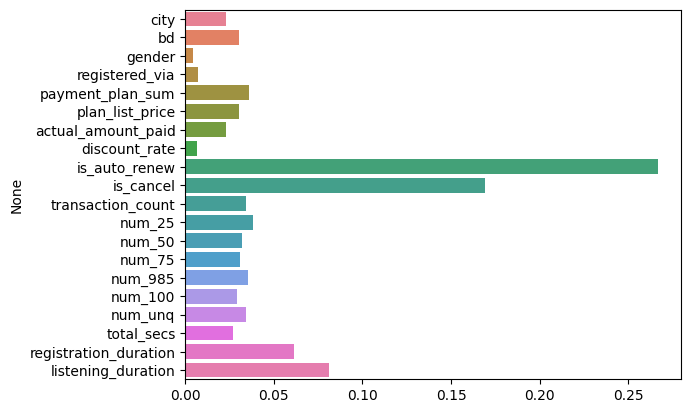

In [18]:
# 특성 중요도
dt_clf.feature_importances_

sns.barplot(x=dt_clf.feature_importances_, y=X_train.columns, hue=X_train.columns)
plt.show()

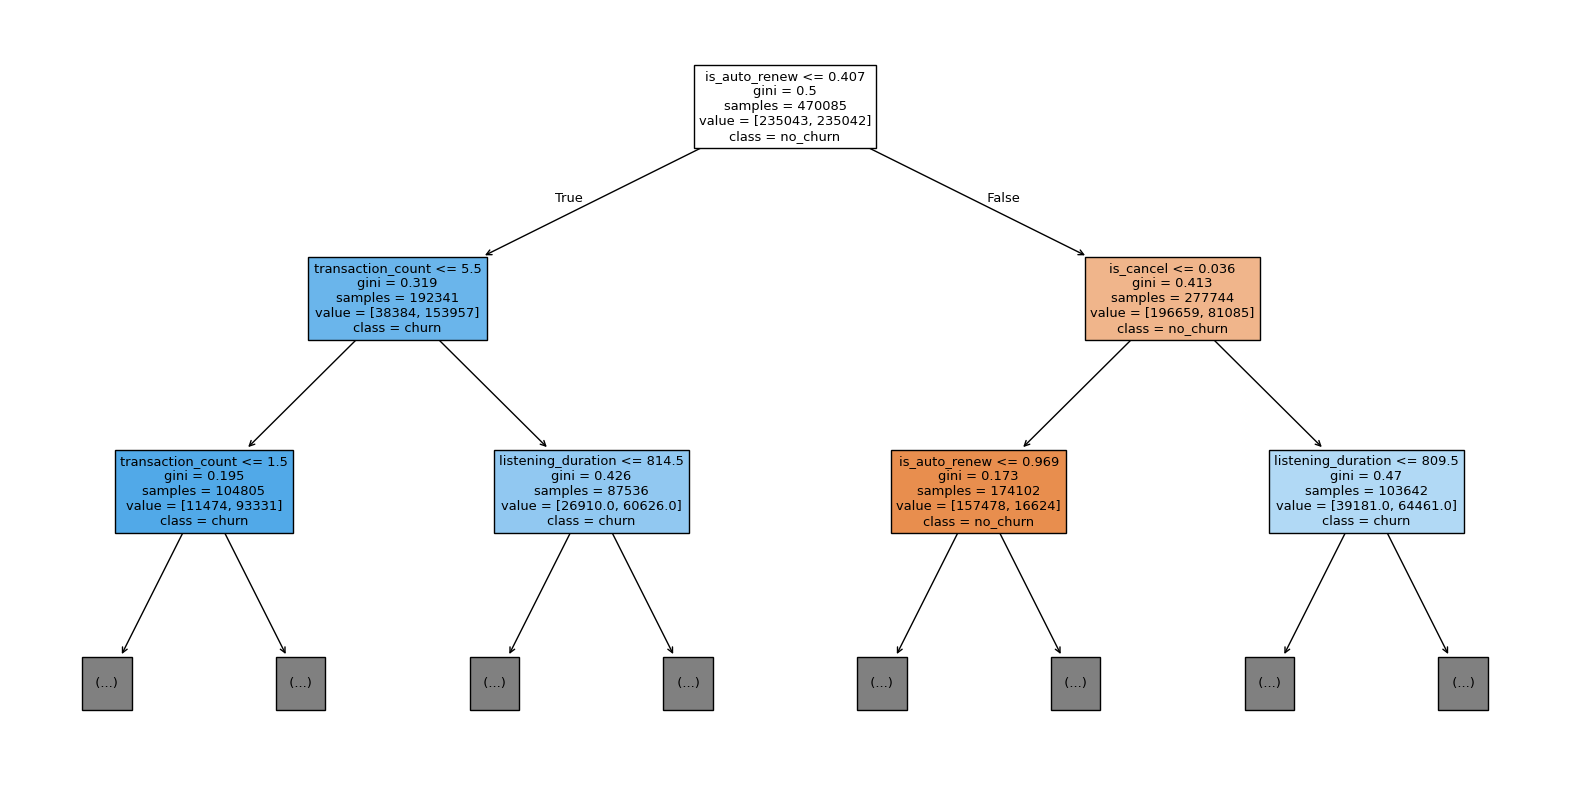

In [19]:
# 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    dt_clf,
    filled=True,
    feature_names=X_train.columns,
    class_names=['no_churn','churn'], 
    max_depth=2
)
plt.show()

----

### RF

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import os
stratified_kfold = StratifiedKFold(n_splits=5)
# RandomForestClassifier 하이퍼파라미터 설정 (GridSearchCV에 사용할 값)
param_grid = {
    # 'n_estimators': [50, 100, 150],       # 트리의 개수
    # 'max_depth': [5, 10, 20, 30, 40, 50]       # 트리의 최대 깊이
    'n_estimators': [150],       # 트리의 개수
    # 'max_depth': [45,50,55,60,65,70]       # 트리의 최대 깊이
    # 'n_estimators': [50, 100, 150],       # 트리의 개수
    'max_depth': [46,47,48,49,50,51,52,53,54]       # 트리의 최대 깊이
    # 'n_estimators': [150,200,250,500],       # 트리의 개수
    # 'max_depth': [49]       # 트리의 최대 깊이
}

# RandomForestClassifier 모델 생성
rf_model = RandomForestClassifier(random_state=42, warm_start=True)

# GridSearchCV를 이용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(rf_model, param_grid=param_grid, scoring="accuracy", cv=stratified_kfold, verbose=2, n_jobs=4)

# 모델 학습
grid_search.fit(X_train_scaled, y_train)

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'max_depth': 51, 'n_estimators': 150}


In [ ]:
RandomForestClassifier(max_depth= 51, n_estimators= 150, random_state=42, warm_start=True)

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5)
rf_clf = RandomForestClassifier(max_depth= 51, n_estimators= 150, random_state=42, warm_start=True)

rf_accuracy = []
rf_precision = []
rf_recall = []
rf_matrix = []
rf_curve = []

for train_index, val_index in stratified_kfold.split(X, y):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[val_index], y.iloc[val_index]

    rf_clf.fit(X_train, y_train)
    y_pred_dt = rf_clf.predict(X_val)
    y_pred_proba = rf_clf.predict_proba(X_val)[:, 1]

    rf_accuracy.append(accuracy_score(y_val, y_pred_dt))
    rf_precision.append(precision_score(y_val, y_pred_dt))
    rf_recall.append(recall_score(y_val, y_pred_dt))
    rf_matrix.append(confusion_matrix(y_val, y_pred_dt))
    rf_curve.append(roc_curve(y_val, y_pred_proba))

print("RF 정확도:", np.mean(rf_accuracy))
print("RF 정밀도:", np.mean(rf_precision))
print("RF 재현율:", np.mean(rf_recall))

c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\ensemble\_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\ensemble\_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\ensemble\_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\ensemble\_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


RF 정확도: 0.9778601100258225
RF 정밀도: 0.9509680274366634
RF 재현율: 0.9092116846738696


In [ ]:
dump(rf_clf, "rf_model.joblib") 

In [ ]:
# 최적 모델로 테스트 데이터에 대한 예측
# best_rf_model = grid_search.best_estimator_
best_rf_model = RandomForestClassifier(max_depth= 51, n_estimators= 150, random_state=42, warm_start=True)
y_pred_best = best_rf_model.predict(X_test_scaled)

# 모델 평가
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Optimized Accuracy: {accuracy_best:.4f}")
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_best))

Optimized Accuracy: 0.9562

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     58600
           1       0.92      0.99      0.96     58922

    accuracy                           0.96    117522
   macro avg       0.96      0.96      0.96    117522
weighted avg       0.96      0.96      0.96    117522



오버샘플링

In [6]:
counter = Counter(y)
print(counter)

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

counter = Counter(y_res)
print(counter)

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_res_scaled = scaler.fit_transform(X_train_res)
# X_test_res_scaled = scaler.transform(X_test_res)

Counter({0: 293803, 1: 62474})
Counter({0: 293803, 1: 293803})


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import os
stratified_kfold = StratifiedKFold(n_splits=5)
# RandomForestClassifier 하이퍼파라미터 설정 (GridSearchCV에 사용할 값)
param_grid = {
    # 'n_estimators': [50, 100, 150],       # 트리의 개수
    # 'max_depth': [5, 10, 20, 30, 40, 50]       # 트리의 최대 깊이
    # 'n_estimators': [50],       # 트리의 개수
    # 'max_depth': [45,50,55,60,65,70] ,      # 트리의 최대 깊이
    # 'n_estimators': [50, 100, 150]       # 트리의 개수
    'max_depth': [61,62,63,64,65,66,67,68,69],       # 트리의 최대 깊이
    'n_estimators': [100]       # 트리의 개수
}

# RandomForestClassifier 모델 생성
rf_model = RandomForestClassifier(random_state=42, warm_start=True)

# GridSearchCV를 이용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(rf_model, param_grid=param_grid, scoring="accuracy", cv=stratified_kfold, verbose=2, n_jobs=4)

# 모델 학습
grid_search.fit(X_train_res_scaled, y_train_res)

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'max_depth': 61, 'n_estimators': 100}


In [ ]:
rf_model = RandomForestClassifier(max_depth= 61, n_estimators= 100, random_state=42, warm_start=True)

In [7]:
stratified_kfold = StratifiedKFold(n_splits=5)
rf_clf_over = RandomForestClassifier(max_depth= 61, n_estimators= 100, random_state=42, warm_start=True)

rf_accuracy_over = []
rf_precision_over = []
rf_recall_over = []
rf_matrix_over = []
rf_curve_over = []

for train_index, val_index in stratified_kfold.split(X_res, y_res):
    X_train, y_train = X_res.iloc[train_index], y_res.iloc[train_index]
    X_val, y_val = X_res.iloc[val_index], y_res.iloc[val_index]

    rf_clf_over.fit(X_train, y_train)
    y_pred_dt = rf_clf_over.predict(X_val)
    y_pred_proba = rf_clf_over.predict_proba(X_val)[:, 1]

    rf_accuracy_over.append(accuracy_score(y_val, y_pred_dt))
    rf_precision_over.append(precision_score(y_val, y_pred_dt))
    rf_recall_over.append(recall_score(y_val, y_pred_dt))
    rf_matrix_over.append(confusion_matrix(y_val, y_pred_dt))
    rf_curve_over.append(roc_curve(y_val, y_pred_proba))

print("RF 정확도:", np.mean(rf_accuracy_over))
print("RF 정밀도:", np.mean(rf_precision_over))
print("RF 재현율:", np.mean(rf_recall_over))

c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\ensemble\_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\ensemble\_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\ensemble\_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
c:\Users\USER\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\ensemble\_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


RF 정확도: 0.9923469648091267
RF 정밀도: 0.987073378155036
RF 재현율: 0.9984037031364341


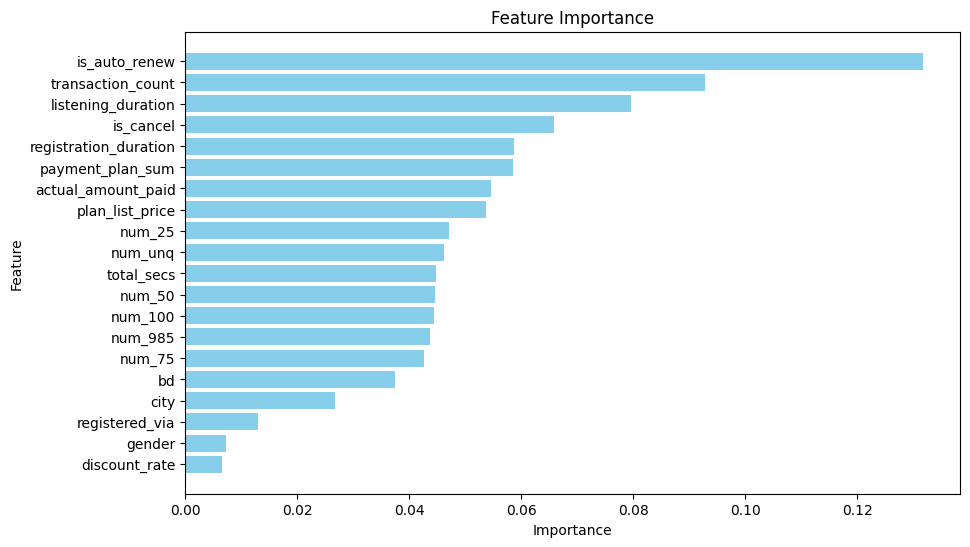

In [9]:
import joblib
model = joblib.load('./rf_model_over.joblib')

# 특성 중요도 가져오기
feature_importances = model.feature_importances_

# 특성 이름 정의 (데이터셋에서 사용한 feature 이름과 동일해야 함)
feature_names = ['city', 'bd', 'gender', 'registered_via',
       'payment_plan_sum', 'plan_list_price', 'actual_amount_paid',
       'discount_rate', 'is_auto_renew', 'is_cancel', 'transaction_count',
       'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq',
       'total_secs', 'registration_duration', 'listening_duration']

# 데이터프레임으로 변환 후 정렬
df_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(df_importance['Feature'], df_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # 중요도가 높은 순으로 정렬
plt.show()

In [10]:
dump(rf_clf_over, "rf_model_over.joblib") 

['rf_model_over.joblib']

In [30]:
confusion_matrix(y_test, y_pred_best)

array([[53850,  4750],
       [  399, 58523]], dtype=int64)